In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
conn = sqlite3.connect('inventory.db')
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


                   name
0       begin_inventory
1         end_inventory
2             purchases
3       purchase_prices
4                 sales
5        vendor_invoice
6  vendor_sales_summary


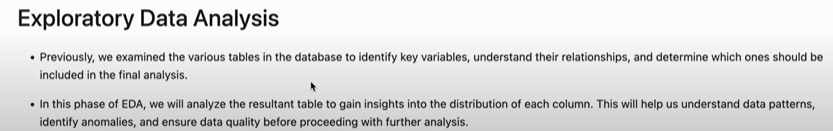

In [5]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5;", conn)
print(df)
df.head()


   VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesDollars  TotalSalesPrice  \
0            3811251.60         5101919.51        672819.31   
1            3804041.22   

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
# summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,5.0,6.101600e+03,6250.196421,1.128000e+03,3.960000e+03,3.960000e+03,4.425000e+03,1.703500e+04
Brand,5.0,4.102400e+03,2489.058818,1.233000e+03,3.405000e+03,3.545000e+03,4.261000e+03,8.068000e+03
PurchasePrice,5.0,2.115200e+01,4.005998,1.617000e+01,1.824000e+01,2.189000e+01,2.319000e+01,2.627000e+01
ActualPrice,5.0,2.879000e+01,5.403702,2.299000e+01,2.499000e+01,2.899000e+01,2.999000e+01,3.699000e+01
Volume,5.0,1.750000e+03,0.000000,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03
TotalPurchaseQuantity,5.0,1.672632e+05,27124.205642,1.381090e+05,1.450800e+05,1.640380e+05,1.874070e+05,2.016820e+05
TotalPurchaseDollars,5.0,3.463600e+06,344139.171043,3.023206e+06,3.261198e+06,3.418304e+06,3.804041e+06,3.811252e+06
TotalSalesDollars,5.0,4.631639e+06,337702.149322,4.223108e+06,4.475973e+06,4.538121e+06,4.819073e+06,5.101920e+06
TotalSalesPrice,5.0,5.322600e+05,98036.319280,4.200500e+05,4.611401e+05,5.457783e+05,5.615124e+05,6.728193e+05
TotalSalesQuantity,5.0,1.651372e+05,28035.053410,1.358380e+05,1.420490e+05,1.602470e+05,1.871400e+05,2.004120e+05


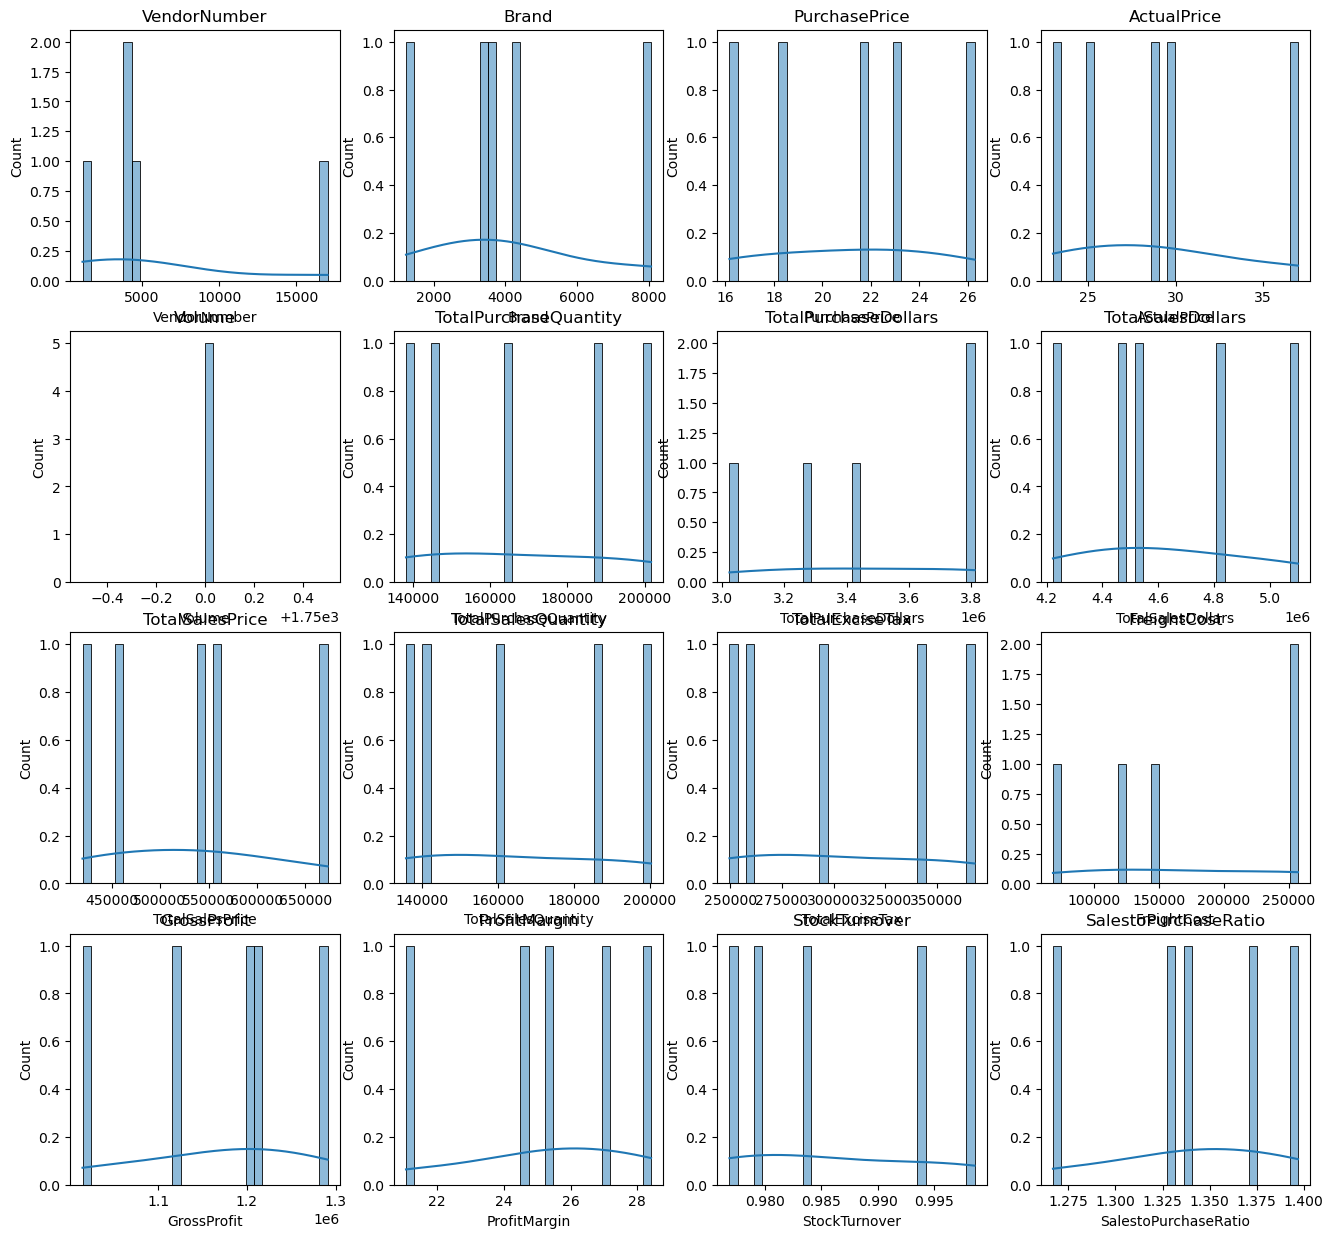

In [7]:
# distribution plots for  numerical cols
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16,15))
for i, col in enumerate(numerical_cols):
# adjust grid layout as needed
     plt.subplot(4,4,i+1) 
     sns.histplot(df[col],kde=True, bins=30)
     plt.title(col)
plt.tight_layout
plt.show()


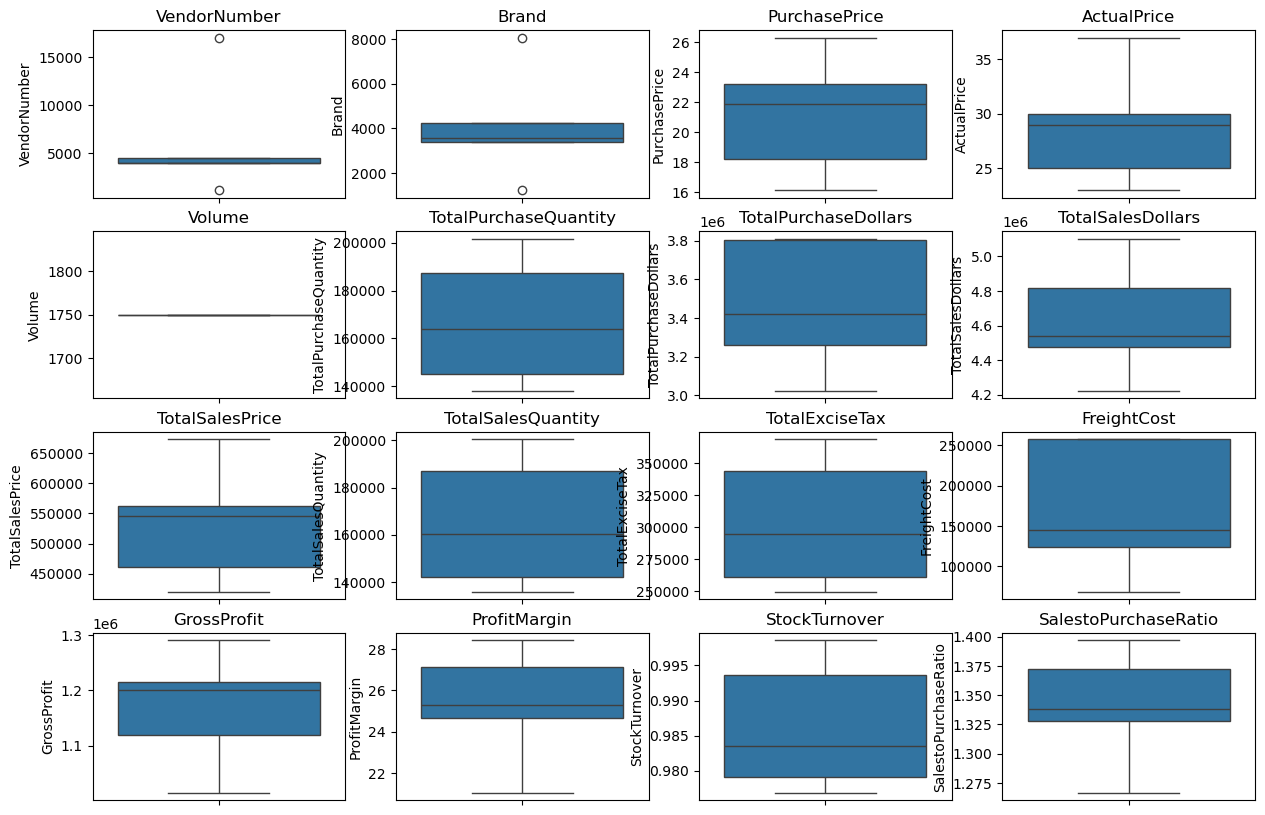

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
# adjust grid layout as needed
     plt.subplot(4,4,i+1) 
     sns.boxplot(y=df[col ])
     plt.title(col)
plt.tight_layout
plt.show()

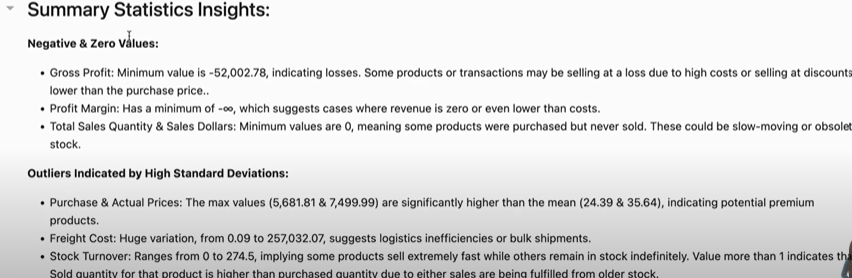

In [9]:
# let filter the data by removing inconsistencies
df=pd.read_sql_query("""SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin >0
AND TotalSalesQuantity> 0""",conn)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72,15.12,257032.07,141.81,98.974037,72.000000,97.469388


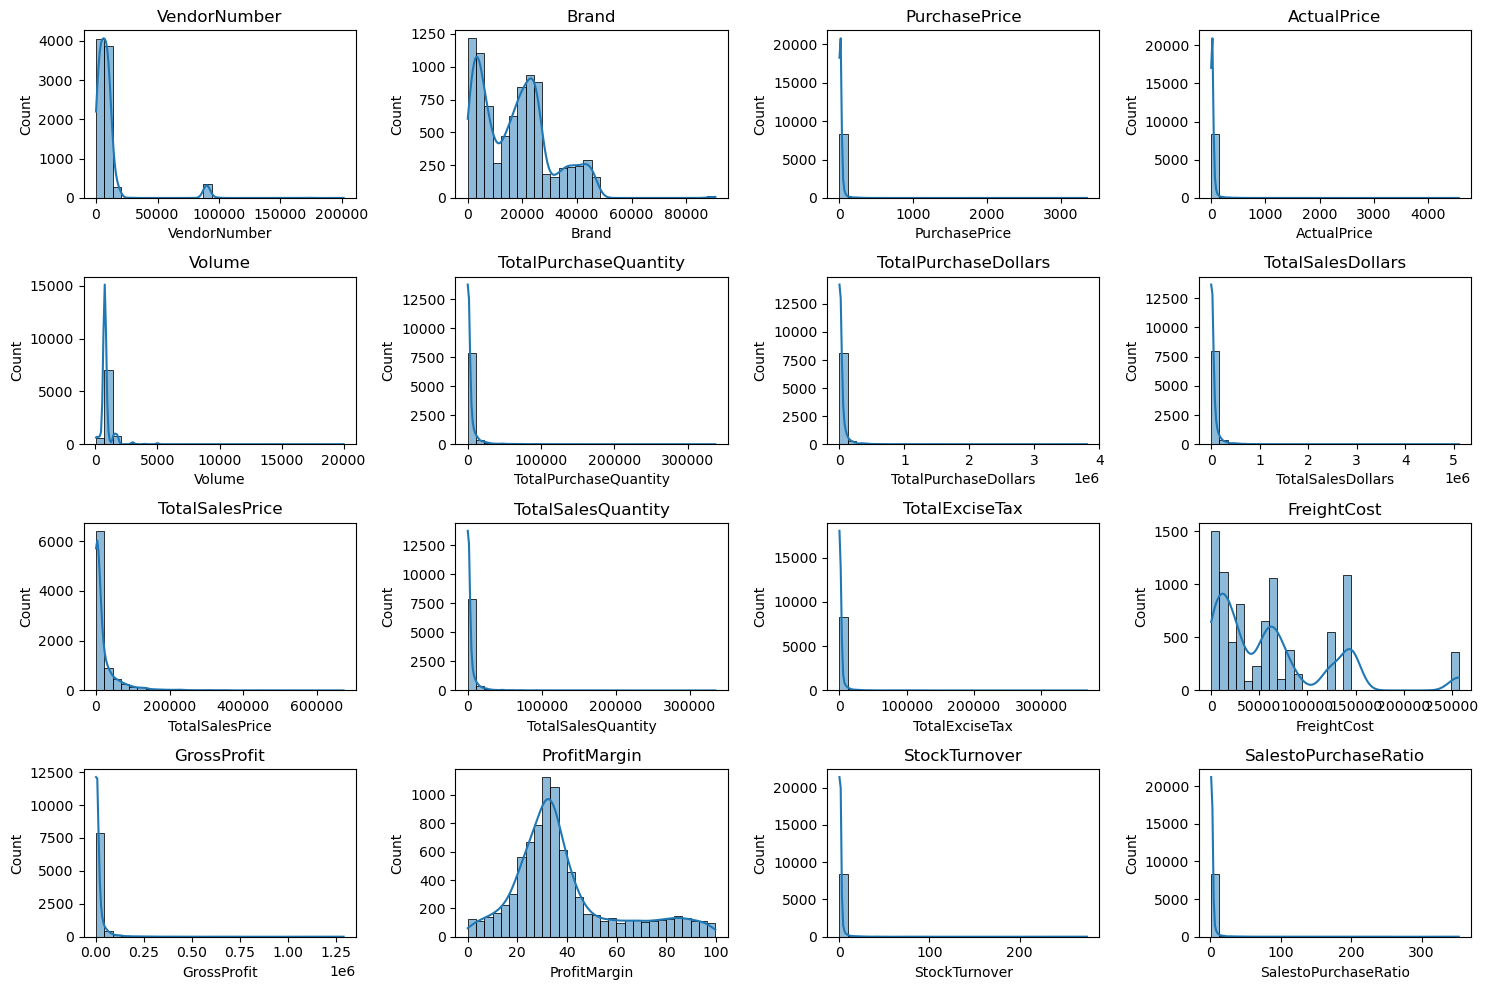

In [11]:
# distribution plots for  numerical cols
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
# adjust grid layout as needed
     plt.subplot(4,4,i+1) 
     sns.histplot(df[col],kde=True, bins=30)
     plt.title(col)
plt.tight_layout()
plt.show()

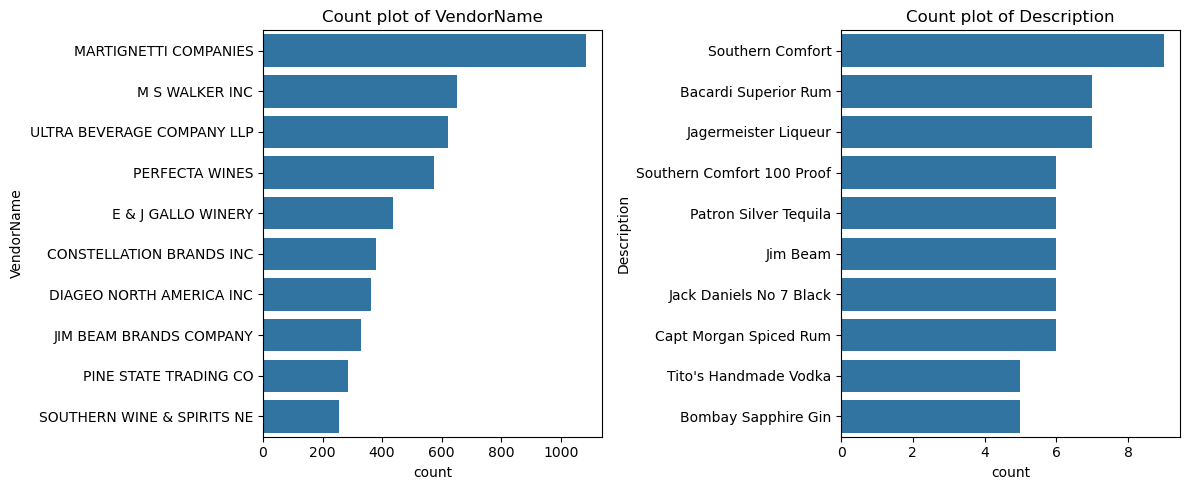

In [12]:
# count plot for categorical columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):

     plt.subplot(1,2,i+1) 
     sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
     plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

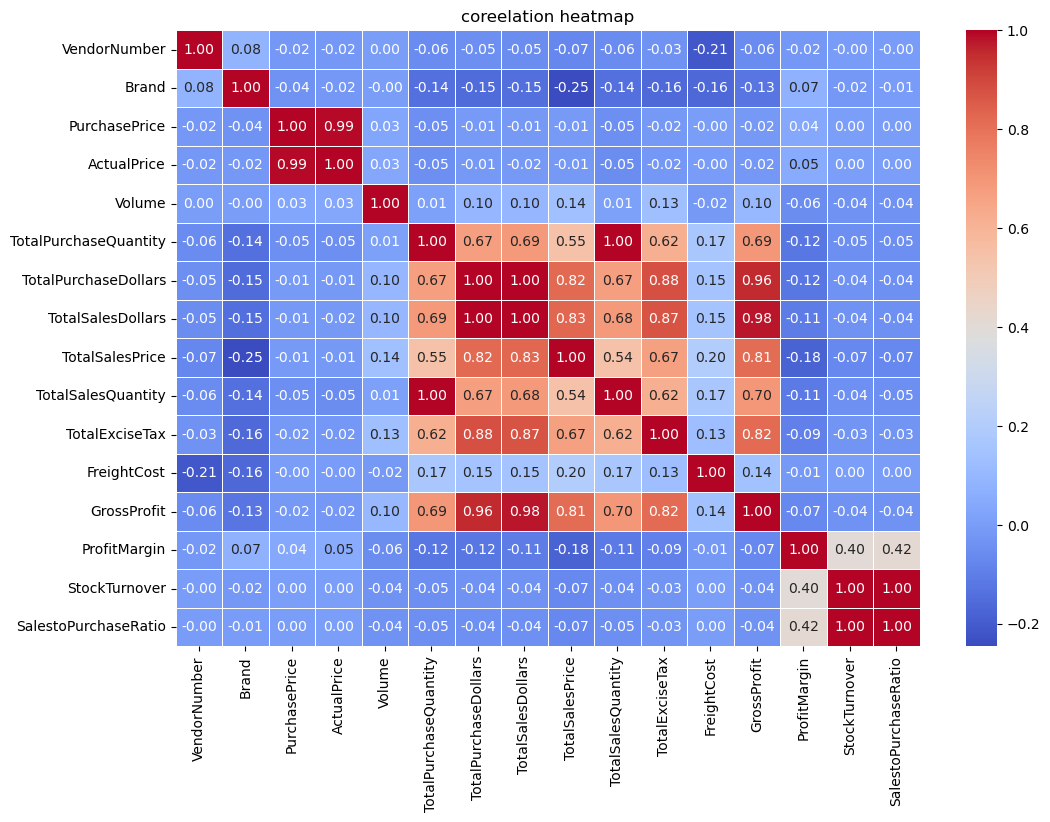

In [13]:
# correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap = "coolwarm",linewidths=0.5)
plt.title("coreelation heatmap")
plt.show()

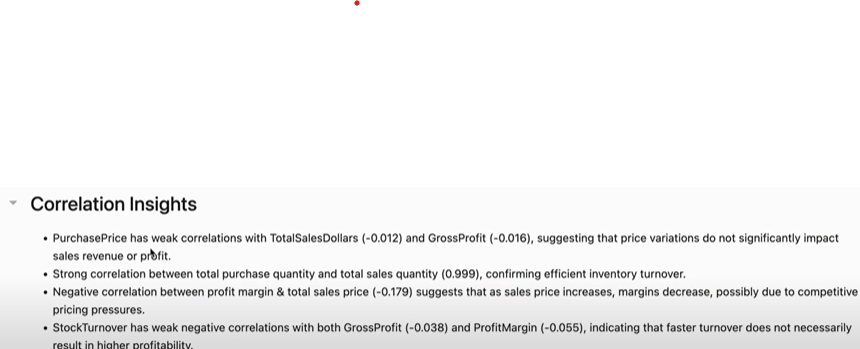

# Data Analysis

identify brand that need promotional or price adjustments which exhibit lower sales performane nut higher profit margins

In [14]:
brand_performance=df.groupby('Description').agg({
   'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [15]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

560.299

In [17]:
high_margin_threshold

64.97017552750113

In [18]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']>= high_margin_threshold)
]
print("brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [19]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

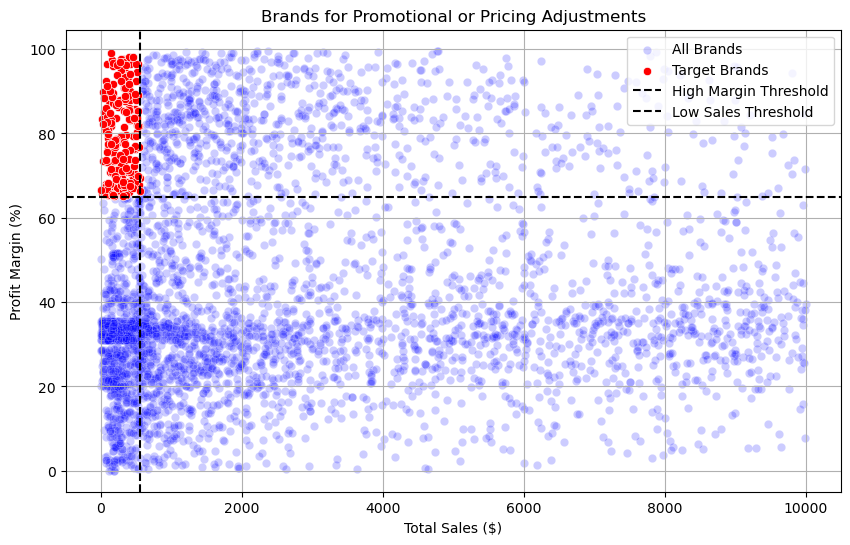

In [20]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='blue',
    label='All Brands',
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='red',
    label='Target Brands'
)

plt.axhline(
    y=high_margin_threshold,
    linestyle='--',
    color='black',
    label='High Margin Threshold'
)

plt.axvline(
    x=low_sales_threshold,
    linestyle='--',
    color='black',
    label='Low Sales Threshold'
)

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
def formate_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value /1_000:.2f}K"
    else:
        return str(value)

which vendor and brands demonstrate the height performance

In [22]:
top_vendors=df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands.apply(lambda x: formate_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

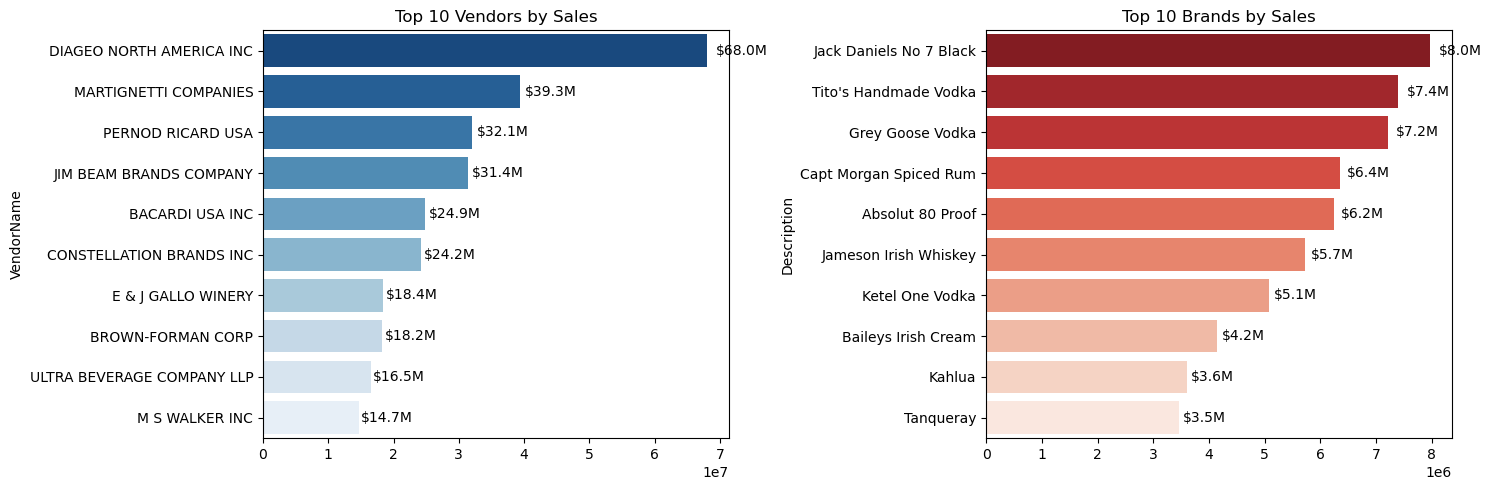

In [25]:
def format_dollars(value):
    """Function to format numbers as dollars with K, M, B for thousands, millions, billions."""
    if value >= 1e9:
        return f'${value/1e9:.1f}B'
    if value >= 1e6:
        return f'${value/1e6:.1f}M'
    if value >= 1e3:
        return f'${value/1e3:.1f}K'
    return f'${value:.0f}'


# Create the figure and subplots
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette='Blues_r'
)
plt.title('Top 10 Vendors by Sales')

# Add sales values on the bars for Top Vendors
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette='Reds_r'
)
plt.title('Top 10 Brands by Sales')

# Add sales values on the bars for Top Brands
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

which vendors contribute the most to total purchase dollars?

In [26]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
   'TotalSalesDollars':'sum',
    'GrossProfit':'sum'
   
}).reset_index()

In [27]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [28]:
vendor_performance

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,704.53,258.37,0.000145
1,ALISA CARR BEVERAGES,25698.12,104470.94,78772.82,0.008362
2,ALTAMAR BRANDS LLC,11706.20,15706.81,4000.61,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,1511.16,577.08,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,139603.53,35167.85,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,56217.13,13522.49,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,405254.83,106837.97,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,7569876.20,1693337.94,1.912074
117,WINE GROUP INC,5203801.17,8304043.28,3100242.11,1.693183


In [29]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [30]:
# display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(formate_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(formate_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(formate_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18


In [31]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [32]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30,24.60
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64,40.00
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31,54.95
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63,62.51
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18,65.69


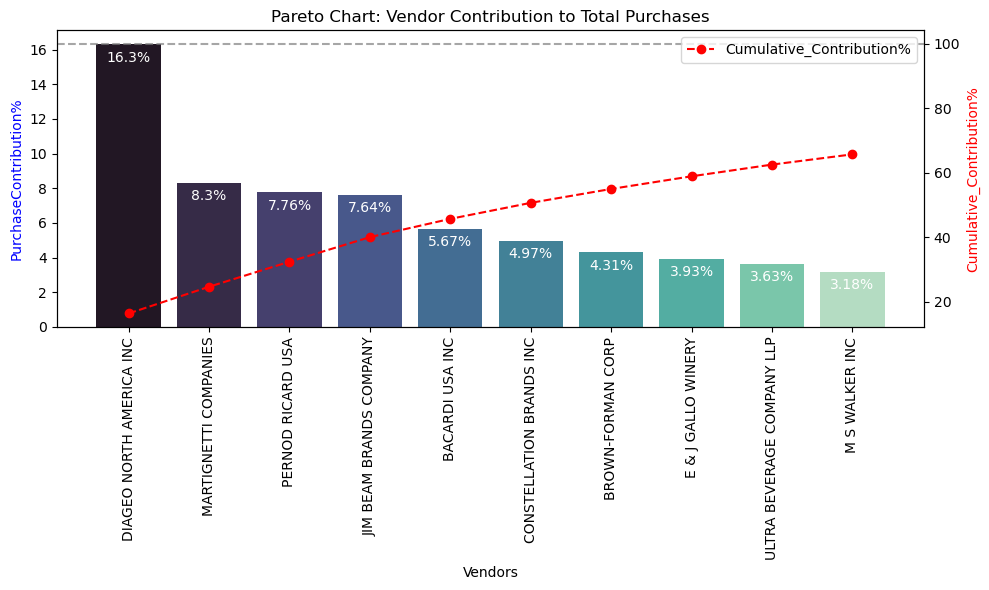

In [33]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    
    palette='mako',
    ax=ax1
)

# Add text labels on the bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i,
        value - 1,
       str(value)+'%',
        ha='center',
        fontsize=10,
        color='white'
    )

# Create a second y-axis for the cumulative line plot
ax2 = ax1.twinx()

# Line Plot for Cumulative Contribution %
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='--',
    label='Cumulative_Contribution%'
)

# Set axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('PurchaseContribution%', color='blue')
ax2.set_ylabel('Cumulative_Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Set x-axis tick labels
# ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

# Add a horizontal line at 80% (or 100% as in the image) for reference
ax2.axhline(
    y=100,
    color='gray',
    linestyle='--',
    alpha=0.7
)

# Combine legends from both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend( loc='upper right')

plt.tight_layout()
plt.show()

how much of total procurement is dependent on the top vendors?

In [34]:
# Calculate total and remaining contribution
total_contribution = top_vendors['PurchaseContribution%'].sum()
remaining_contribution = 100 - total_contribution
total_contribution

65.69000000000001

Total Purchase Contribution of top 10 vendors is 65.69 %


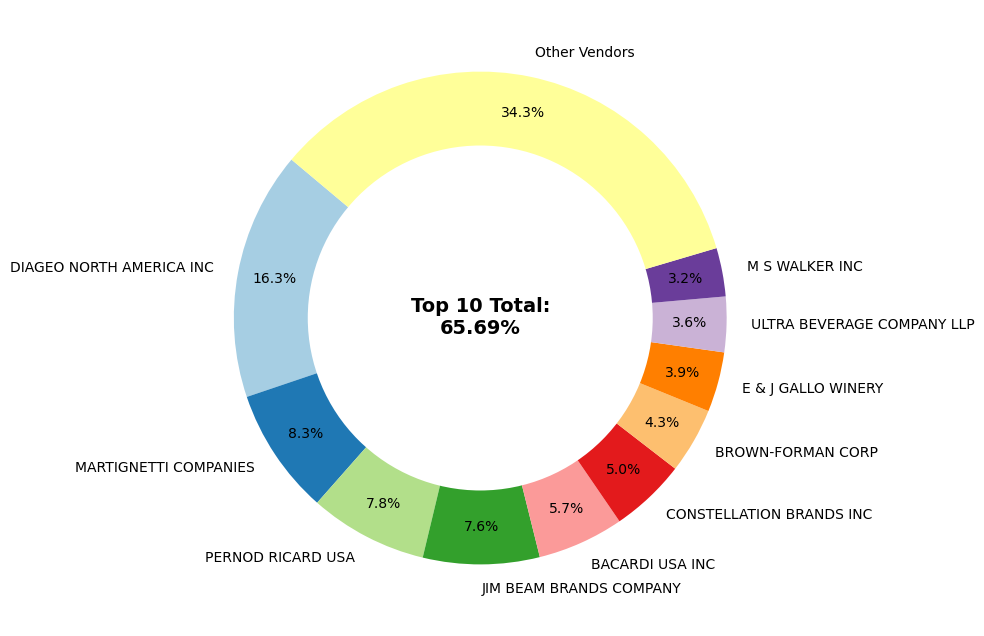

In [35]:
# Prepare data for the pie chart
vendors_list = list(top_vendors['VendorName'].values)
purchase_contributions_list = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions_list)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors_list.append("Other Vendors")
purchase_contributions_list.append(remaining_contribution)

# Print the total purchase contribution
print(f"Total Purchase Contribution of top 10 vendors is {round(total_contribution, 2)} %")

# Create the Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the pie chart wedges
wedges, texts, autotexts = ax.pie(
    purchase_contributions_list,
    labels=vendors_list,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
ax.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.show()

does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [36]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [37]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["small","medium","large"])

In [38]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [39]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


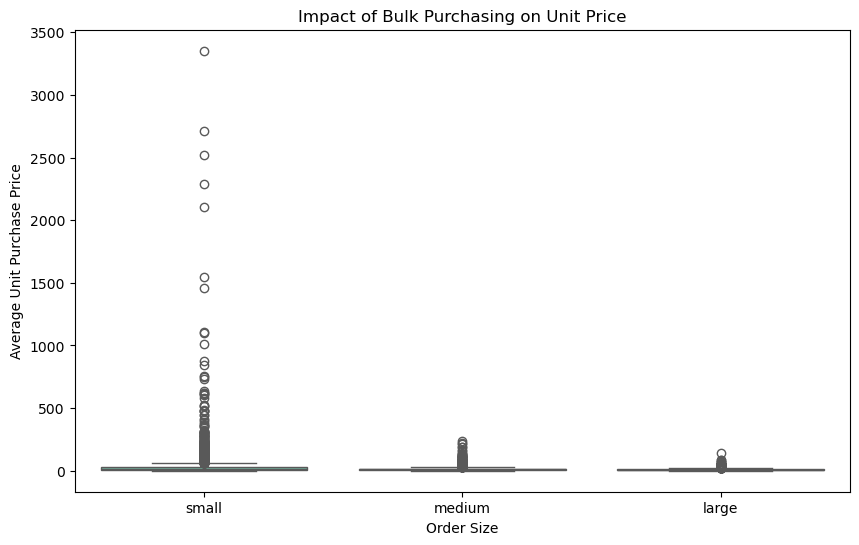

In [40]:
# Create the box plot
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='OrderSize',
    y='UnitPurchasePrice',
    palette='Set2'
)

plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

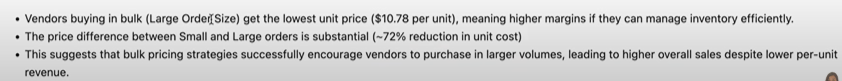

which vendors is low inventory turnover,indicating excess stock and slow-moving products

In [41]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


how much capital is locked in unsold inventory per vendor and which vendors contribute the most it?

In [42]:
# Calculate the UnsoldInventoryValue
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

# Print the total unsold capital
print(f"Total Unsold Capital: {format_dollars(df['UnsoldInventoryValue'].sum())}")

Total Unsold Capital: $2.7M


In [43]:

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by='UnsoldInventoryValue',
    ascending=False
)

# Apply dollar formatting for display
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display the top 10
print(inventory_value_per_vendor.head(10).to_markdown(index=False))

| VendorName               | UnsoldInventoryValue   |
|:-------------------------|:-----------------------|
| DIAGEO NORTH AMERICA INC | $722.2K                |
| JIM BEAM BRANDS COMPANY  | $554.7K                |
| PERNOD RICARD USA        | $470.6K                |
| WILLIAM GRANT & SONS INC | $402.0K                |
| E & J GALLO WINERY       | $228.3K                |
| SAZERAC CO INC           | $198.4K                |
| BROWN-FORMAN CORP        | $177.7K                |
| CONSTELLATION BRANDS INC | $133.6K                |
| MOET HENNESSY USA INC    | $126.5K                |
| REMY COINTREAU USA INC   | $118.6K                |


what is the 95% confidence interval for profit margin of top-performing and low-performing vendors

In [44]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [45]:
top_vendors=df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()

In [46]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [47]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [48]:
def confidence_interval(data, confidence=0.95):
    """
    Calculates the confidence interval for a given dataset.

    Parameters:
    data (array-like): The dataset to calculate the confidence interval for.
    confidence (float): The desired confidence level (e.g., 0.95 for 95%).

    Returns:
    tuple: A tuple containing the mean, lower bound, and upper bound of the confidence interval.
    """
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Example Usage:
# Assuming 'ProfitMargin' is a pandas Series or a list of data
# Replace this with your actual data
ProfitMargin = np.random.normal(loc=15, scale=5, size=2142)

mean_profit_margin, lower_bound, upper_bound = confidence_interval(ProfitMargin)

print(f"Mean Profit Margin: {mean_profit_margin:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean Profit Margin: 15.09
95% Confidence Interval: [14.88, 15.30]


Top Vendors 95% CI: [30.74, 31.61], Mean: 31.18
Low Vendors 95% CI: [40.50, 42.64], Mean: 41.57


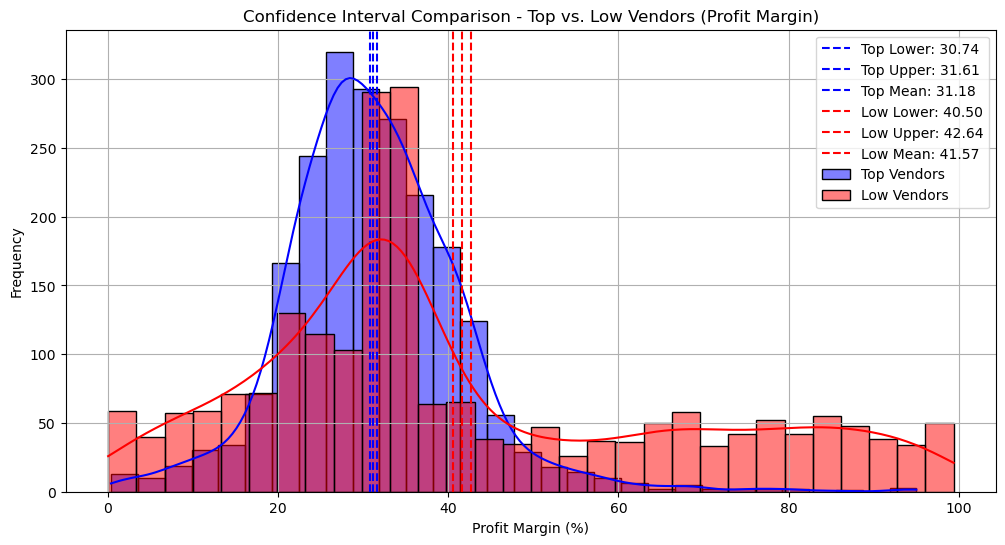

In [49]:

# Calculate confidence intervals for both groups
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print the results
print(f"Top Vendors 95% CI: [{top_lower:.2f}, {top_upper:.2f}], Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: [{low_lower:.2f}, {low_upper:.2f}], Mean: {low_mean:.2f}")

# Create the plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(
    top_vendors,
    kde=True,
    color='blue',
    bins=30,
    alpha=0.5,
    label="Top Vendors"
)
plt.axvline(
    top_lower,
    color='blue',
    linestyle='--',
    label=f"Top Lower: {top_lower:.2f}"
)
plt.axvline(
    top_upper,
    color='blue',
    linestyle='--',
    label=f"Top Upper: {top_upper:.2f}"
)
plt.axvline(
    top_mean,
    color='blue',
    linestyle='--',
    label=f"Top Mean: {top_mean:.2f}"
)

# Low Vendors Plot
sns.histplot(
    low_vendors,
    kde=True,
    color='red',
    bins=30,
    alpha=0.5,
    label="Low Vendors"
)
plt.axvline(
    low_lower,
    color='red',
    linestyle='--',
    label=f"Low Lower: {low_lower:.2f}"
)
plt.axvline(
    low_upper,
    color='red',
    linestyle='--',
    label=f"Low Upper: {low_upper:.2f}"
)
plt.axvline(
    low_mean,
    color='red',
    linestyle='--',
    label=f"Low Mean: {low_mean:.2f}"
)

# Finalize Plot
plt.title('Confidence Interval Comparison - Top vs. Low Vendors (Profit Margin)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

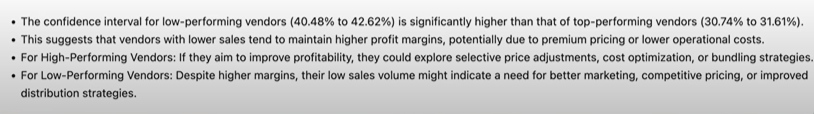

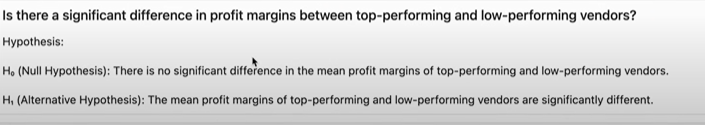

In [50]:
# Define thresholds based on quartiles
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

# Separate the two groups of vendors
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-Sample t-Test
# equal_var=False performs Welch's t-test, which does not assume equal population variance
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [51]:
df.to_csv("Vendor_Performance_Analysis.csv")